In [100]:
#imports and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pollution= pd.read_csv('pollution_2000_2021.csv')
pollution.head()

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [101]:
#Grouping the data by state and calculating the mean of the AQI for each state and selecting the top 5 states for each pollutant
grouped_states=pollution.groupby('State')
top_5_states_NO2=grouped_states['NO2 AQI'].mean().sort_values(ascending=False).head(5)
top_5_states_03 = grouped_states['O3 AQI'].mean().sort_values(ascending=False).head(5) #komt niet overeen met foto
top_5_states_SO2 = grouped_states['SO2 AQI'].mean().sort_values(ascending=False).head(5)
top_5_states_CO = grouped_states['CO AQI'].mean().sort_values(ascending=False).head(5)
print(top_5_states_NO2)
print(top_5_states_03)
print(top_5_states_SO2)
print(top_5_states_CO)


State
Colorado      34.126421
Arizona       33.490963
Michigan      30.755185
New York      29.546135
New Jersey    28.980657
Name: NO2 AQI, dtype: float64
State
North Carolina    46.539024
Kentucky          45.378688
Michigan          44.702885
Tennessee         44.580006
New Mexico        44.522416
Name: O3 AQI, dtype: float64
State
Michigan        16.619928
Pennsylvania    14.494253
Alaska          13.736148
Kentucky        13.426424
Illinois        12.316014
Name: SO2 AQI, dtype: float64
State
District Of Columbia    9.415644
Arizona                 8.255187
California              6.840152
Colorado                6.770029
Michigan                6.397205
Name: CO AQI, dtype: float64


In [102]:
#Creating a dictionary with the top 5 states for each pollutant
pollutants = {
    'NO2 AQI': top_5_states_NO2,
    'O3 AQI': top_5_states_03,
    'SO2 AQI': top_5_states_SO2,
    'CO AQI': top_5_states_CO
}


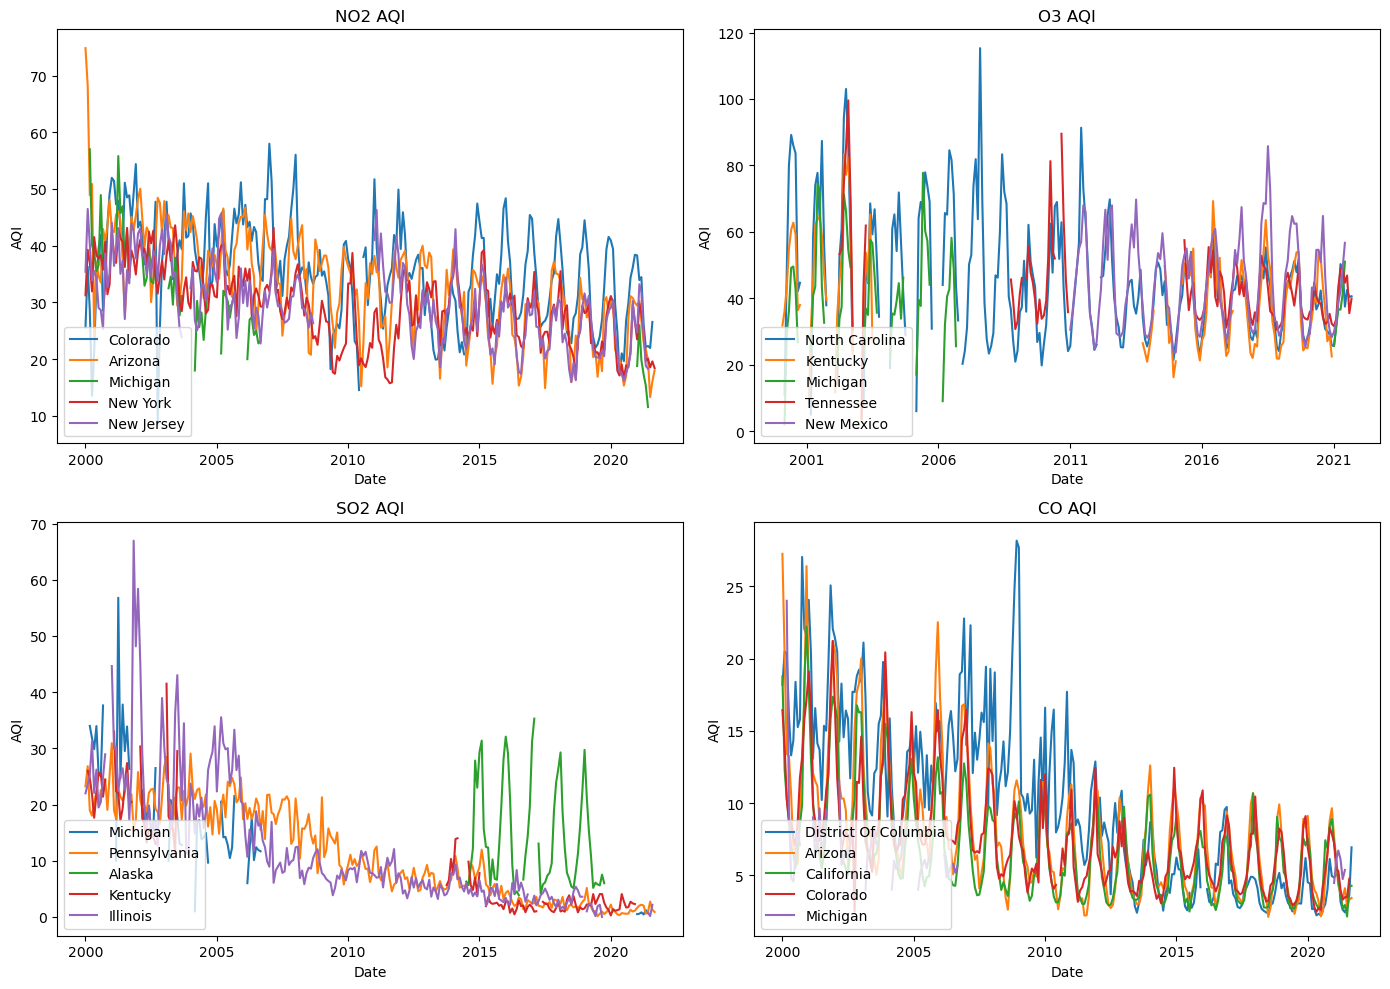

In [103]:
#Plotting the data
plt.figure(figsize=(14, 10))
# Plot each pollutant in a separate subplot
for i, (pollutant, top_states) in enumerate(pollutants.items(), 1):
    plt.subplot(2, 2, i)
    #Filter data for top 5 states for this pollutant
    df_filtered = pollution[pollution['State'].isin(top_states.index)]
    # Compute monthly mean AQI per state
    monthly_mean = df_filtered.groupby(['Year','Month', 'State'])[pollutant].mean().reset_index()
    monthly_mean["Date"] = pd.to_datetime(monthly_mean[["Year", "Month"]].assign(DAY=1))
    # Plot each state's data
    for state in top_states.index:
        state_data = monthly_mean[monthly_mean['State'] == state]
        # Ensure months are continuous so we don't get horizontal lines if datapoints are missing.
        all_months = pd.date_range(start=state_data['Date'].min(), 
                                   end=state_data['Date'].max(), 
                                   freq='MS')
        state_data = state_data.set_index('Date').reindex(all_months).reset_index().rename(columns={'index': 'Date'})
        plt.plot(state_data['Date'], state_data[pollutant], label=state)
    # Title and labels
    plt.title(f'{pollutant}')
    plt.xlabel('Date')
    plt.ylabel('AQI')

    # Set x-axis ticks to show every 5 years
    years = pd.date_range(start=monthly_mean['Date'].min(), end=monthly_mean['Date'].max(), freq='5YS')
    plt.xticks(years, [str(year.year) for year in years])
    plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


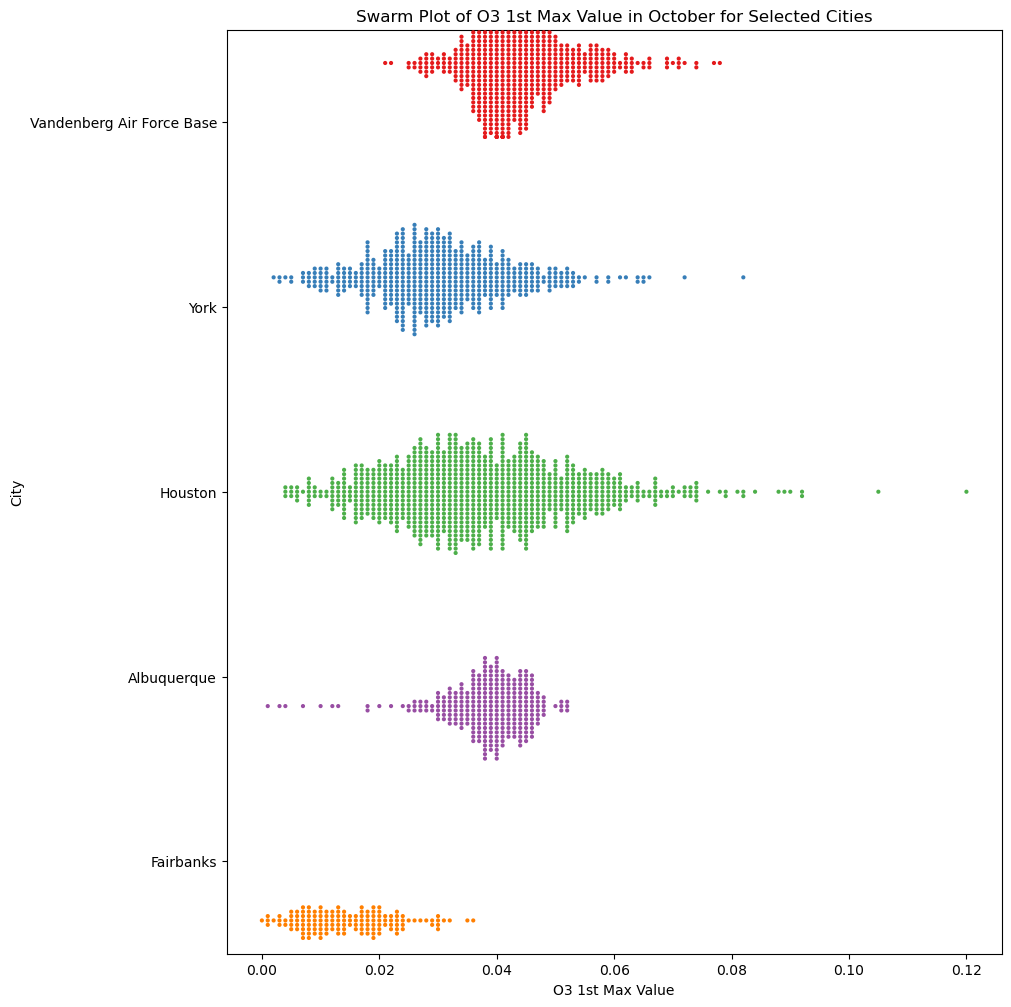

In [104]:

# Convert Date column to datetime format
pollution['Date'] = pd.to_datetime(pollution['Date'])

# Extract Month and filter date for month October
pollution['Month'] = pollution['Date'].dt.month
october_data = pollution[pollution['Month'] == 10]

# Select 5 cities, and group by citey and take the mean of the o3 first max value
selected_cities = ["York", "Albuquerque", "Houston", "Fairbanks", "Vandenberg Air Force Base"]
october_data = october_data[october_data['City'].isin(selected_cities)]
october_grouped = october_data.groupby('City')['O3 1st Max Value'].mean().reset_index()

# Plot swarmplot, and add correct labels and title 
plt.figure(figsize=(10, 12))
#size 3 gets warnings, so smaller size needed, or change figsize -> did change figsize
#added dodge to remove warning with label
sns.swarmplot(data=october_data, x="O3 1st Max Value", y="City", hue="City", palette="Set1", size=3, dodge=True)
plt.xlabel("O3 1st Max Value")
plt.ylabel("City")
plt.title("Swarm Plot of O3 1st Max Value in October for Selected Cities")
#to remove warning about legend
handles, labels = plt.gca().get_legend_handles_labels()
#only if handles exist add them to labels
if handles:  
    plt.legend(handles, labels, title="City", bbox_to_anchor=(1.05, 1), loc=2)


plt.show()



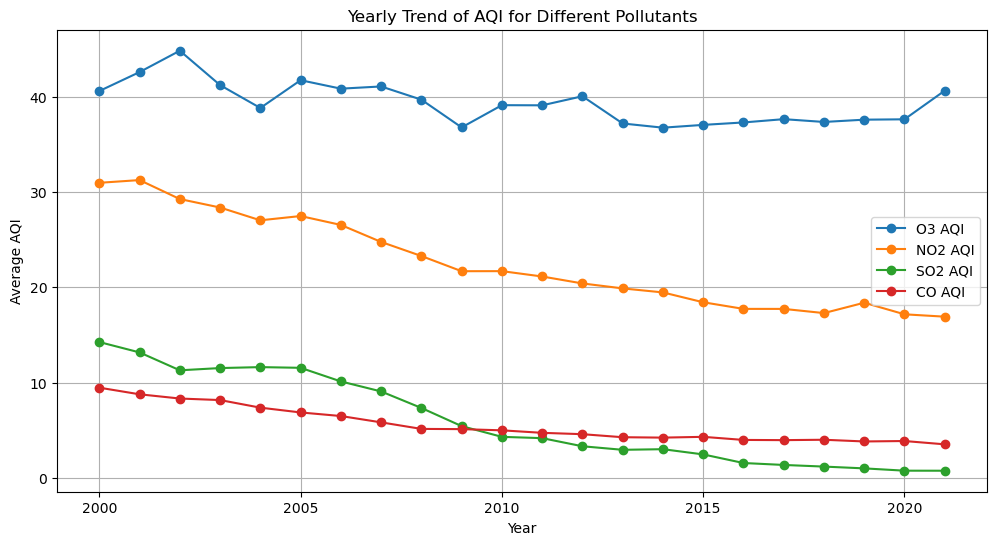

In [105]:
#python Trend Analysis: Line Plot of AQI Over Time
# In this graph, it is possible to see the trend of the AQI over time for each pollutant.
# This way we can see if the AQI is increasing or decreasing over the years for each pollutant.
plt.figure(figsize=(12, 6))
# Convert 'Date' to datetime
pollution['Date'] = pd.to_datetime(pollution['Date'])

# Group by year and calculate mean AQI
yearly_avg = pollution.groupby(pollution['Date'].dt.year)[['O3 AQI', 'NO2 AQI', 'SO2 AQI', 'CO AQI']].mean()

# Plot AQI trends
for pollutant in ['O3 AQI', 'NO2 AQI', 'SO2 AQI', 'CO AQI']:
    plt.plot(yearly_avg.index, yearly_avg[pollutant], marker='o', label=pollutant)

plt.title("Yearly Trend of AQI for Different Pollutants")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.legend()
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

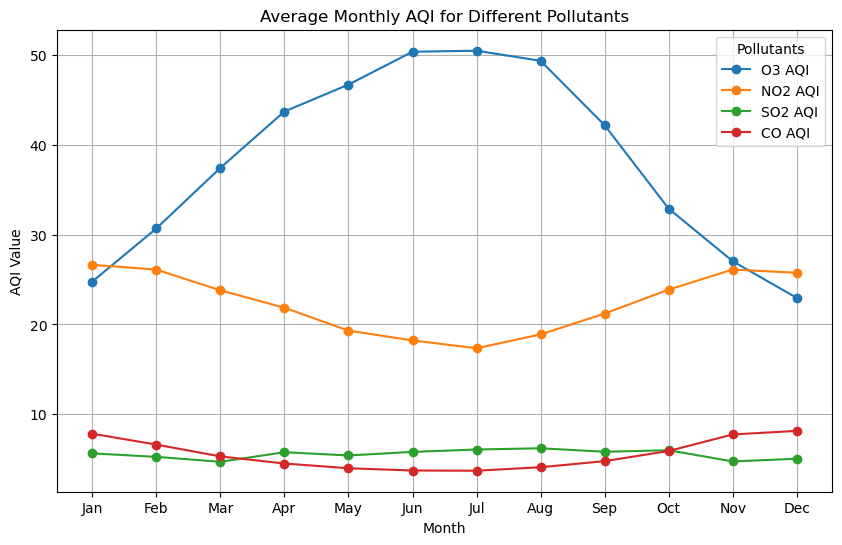

In [106]:
#python Seasonal Variation: Monthly AQI Trends
# In this graph, it is possible to see the average AQI for each pollutant over the months.
# This way we can see if the pollution are decreasing or increasing in certain months.
plt.figure(figsize=(10, 6))

# Extract months
pollution['Month'] = pollution['Date'].dt.month

# Group by month and calculate average AQI
monthly_trends = pollution.groupby('Month')[['O3 AQI', 'NO2 AQI', 'SO2 AQI', 'CO AQI']].mean()

# Plot seasonal trends
monthly_trends.plot(marker='o', figsize=(10, 6))
plt.title("Average Monthly AQI for Different Pollutants")
plt.xlabel("Month")
plt.ylabel("AQI Value")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend(title="Pollutants")
plt.show()
